In [28]:
!pip install agentpy pathfinding owlready2

In [99]:
import agentpy as ap
import pathfinding as pf        
import matplotlib.pyplot as plt
from owlready2 import *
import itertools
import random
import IPython
import math
import numpy as np

In [100]:
# onto = get_ontology("file:///content/coin_onto.owl")

In [101]:
class BoxAgent(ap.Agent):
    def __init__(self, uid, position):
        self.uid = uid                   
        self.position = position()  
        self.agentType = "box"

In [102]:
class StackAgent(ap.Agent):
    def __init__(self, uid, position):
        self.position = position() 
        self.boxes = []

    def add_box(self, box):
        self.boxes.append(box)

    def is_full(self):
        return len(self.boxes) == self.model.num_boxes_per_stack


In [103]:
class RobotAgent(ap.Agent):
    def __init__(self, uid, position):
        self.uid = uid                   
        self.position = position()  
        self.agentType = "robot"

In [145]:
class Warehouse(ap.Model):
    #A warehouse will have m x n spaces
    def setup(self):
        #Create the grid world
        self.warehouse = ap.Grid(self,self.p.worldSize,track_empty=True)
        
        # Create box agents with distinct random positions
        self.boxes = ap.AgentList(
            self, self.p.boxAgents, BoxAgent, position=lambda: self.random_empty_position()
        )

        # Create robot agents with distinct random positions
        self.robots = ap.AgentList(
            self, self.p.robotAgents, RobotAgent, position=lambda: self.random_empty_position()
        )

        #Create Stack agents
        self.stacks = []

        #Add agents to the grid
        self.warehouse.add_agents(self.boxes,random=True,empty=True)
        self.warehouse.add_agents(self.robots,random=True,empty=True)
        
    def random_empty_position(self):
        empty_positions = self.warehouse.empty
        if empty_positions:
            return random.choice(empty_positions)
        else:
            return None  # No empty positions available
        
    
#     def step(self):
#         # Move robots
#         for robot in self.robots:
#             self.move_robot(robot)

#         # Check for termination condition
#         if self.boxes and all(box.position is None for box in self.boxes):
#             self.end()

#     def move_robot(self, robot):
#         # Implement logic to move robots
#         # For example, move towards the center
#         target_position = self.move_towards_center(robot.position)
#         if target_position:
#             robot.position = target_position

#         # Check for nearby boxes and pick them up
#         self.pick_up_boxes(robot)

#     def move_towards_center(self, current_position):
#         # Implement logic to move towards the center
#         # For example, move one step towards the center
#         center_position = (self.p.worldSize[0] // 2, self.p.worldSize[1] // 2)
#         x, y = current_position
#         dx = 1 if x < center_position[0] else -1 if x > center_position[0] else 0
#         dy = 1 if y < center_position[1] else -1 if y > center_position[1] else 0

#         new_position = (x + dx, y + dy)
#         if new_position in self.warehouse.positions:
#             return new_position
#         else:
#             return None

#     def pick_up_boxes(self, robot):
#         # Check for nearby boxes in 8 surrounding squares
#         for dx in [-1, 0, 1]:
#             for dy in [-1, 0, 1]:
#                 neighbor_position = (robot.position[0] + dx, robot.position[1] + dy)
#                 box_at_neighbor = self.get_box_at_position(neighbor_position)

#                 if box_at_neighbor:
#                     robot.position = None  # Robot picks up the box
#                     box_at_neighbor.position = None  # Box is no longer on the grid

#     def get_box_at_position(self, position):
#         # Return the box at a given position, if any
#         for box in self.boxes:
#             if box.position == position:
#                 return box
#         return None

#     def update(self):
#         # Implement logic to update the state (e.g., stacking boxes)
#         # For example, check if a robot is at the center and stack boxes
#         for robot in self.robots:
#             if robot.position == (self.p.worldSize[0] // 2, self.p.worldSize[1] // 2):
#                 self.stack_boxes(robot)

#     def stack_boxes(self, robot):
#         # Find the stack at the center or create a new one
#         center_stack = next((stack for stack in self.stacks if stack.position == robot.position), None)
#         if not center_stack:
#             center_stack = StackAgent(len(self.stacks), robot.position)
#             self.stacks.append(center_stack)

#         # Add up to 5 boxes to the stack
#         for _ in range(min(5 - len(center_stack.boxes), len(self.boxes))):
#             box = self.get_box_at_position(robot.position)
#             if box:
#                 center_stack.add_box(box)
#                 self.boxes.remove(box)

#     def end(self):
#         print("All boxes have been picked up and stacked!")
#         super().end()

In [142]:
def visualize_warehouse(model):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a numpy array to represent the grid
    grid = np.zeros(model.p.worldSize)

    # Set the value to 1 for cells containing boxes
    for box in model.boxes:
        grid[box.position[0], box.position[1]] = 1

    # Set the value to 2 for cells containing robots
    for robot in model.robots:
        grid[robot.position[0], robot.position[1]] = 2

    # Use imshow to display the grid with colored cells
    cmap = plt.cm.get_cmap('tab10', 3)  # Use tab10 colormap with 3 colors (0, 1, 2)
    ax.imshow(grid, cmap=cmap, origin='upper', extent=(0, model.p.worldSize[0], 0, model.p.worldSize[1]))

    ax.set_xticks([i for i in range(model.p.worldSize[0])])
    ax.set_yticks([i for i in range(model.p.worldSize[1])])
    ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='black')
    ax.set_title('Warehouse Setup')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # Create a legend for the colormap
    legend_labels = {1: 'Box', 2: 'Robot'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10, label=label)
               for i, label in legend_labels.items()]
    ax.legend(handles=handles, loc='upper right')

    plt.show()


C:\Users\mayal\AppData\Local\Temp\ipykernel_14572\692966030.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 3)  # Use tab10 colormap with 3 colors (0, 1, 2)


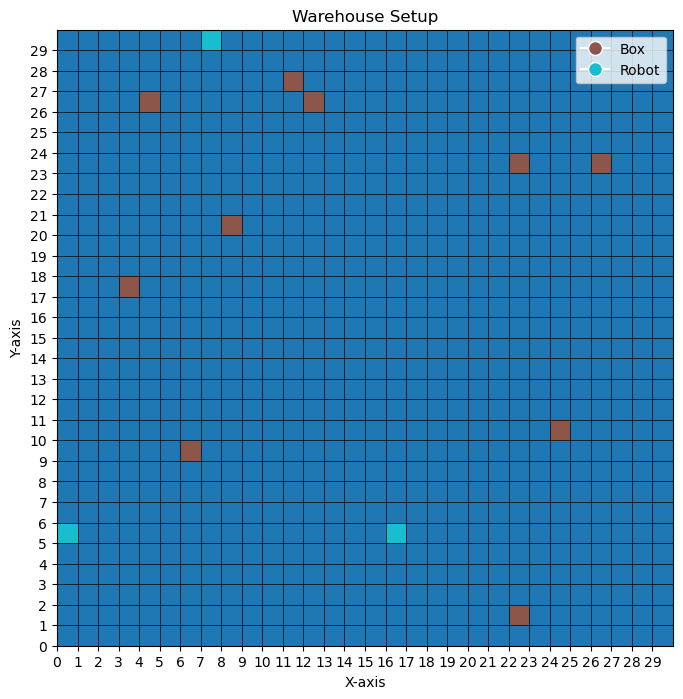

In [144]:
r = random.random()

parameters = {
    "boxAgents": 10,
    "robotAgents": 3,
    "worldSize": (30, 30),
    "steps": 100,
    "seed": 13 * r,
}

model = Warehouse(parameters)
model.setup()
visualize_warehouse(model)

In [ ]:
# class Robot(ap.Agent):

#     def __init__(self, uid, position):
#         self.position = position
#         self.holding_box = False

#     def find_nearest_incomplete_stack(self):
#         #Find the nearest incomplete stack
#         #If there are no incomplete stacks, return None
#         #If there are incomplete stacks, return the nearest one
#         incomplete_stacks = [stack for stack in self.model.stacks if not stack.is_full()]
#         if not incomplete_stacks:
#             return None

#         closest_stack = min(incomplete_stacks, key=lambda stack: self.distance_to(stack))
#         return closest_stack
    
#     def distance_to(self, position):
#         x1, y1 = self.position
#         x2, y2 = position
#         return abs(x1-x2) + abs(y1-y2) #Can be changed for a manhattan distance/euclidean distance calculation
    
#     def distance_to_target(self, position, target_position):
#         x1, y1 = position
#         x2, y2 = target_position
#         return abs(x1-x2) + abs(y1-y2)
    
#     def move_to(self, position):
#         pass
#         #Examines the best way to reach a certain position and then moves towards it

# #         possible_steps = self.model.grid.get_neighborhood(self.position, moore=False, include_center=False)
# #         best_step = min(possible_steps, key=lambda step: self.distance_to_target(step, position))
# #         self.model.grid.move_agent(self, best_step)

#     def move(self):
#         #Moves the agent. If the agent is holding a box, it will move to the nearest incomplete stack. If not, move randomly.
#         if self.holding_box:
#             stack = self.find_nearest_incomplete_stack()
#             if stack:
#                 self.move_to(stack.position)
#         else:
#             possible_steps = self.model.grid.get_neighborhood(self.position, moore=False, include_center=False)
#             possible_steps = [step for step in possible_steps if step not in self.model.boxes_location]
#         if possible_steps:
#             self.move_to(self.random.choice(possible_steps))

#     def pick_up_box(self):
#         #pick up box from an adjacent cell if there is one
#         if not self.holding_box:
#             neighbors = self.model.grid.neighbors(self)
#             for neighbor_position in neighbors:
#                 box = next(self.model.grid.iter_cell_list_contents(neighbor_position))
#                 if box:
#                     self.model.grid.remove_agent(box)
#                     self.holding_box = True
#                     break

#     def stack_box(self):
#         #Stack a box in an adjacent incomplete stack. If there is none, it creates a new one if possible, or it moves to another stack.

#         if self.holding_box:
#             nearest_stack = self.find_nearest_incomplete_stack()

#             if(nearest_stack and self.distance_to(nearest_stack.position) <=1 and not nearest_stack.is_full()):
#                 nearest_stack.add_box(self.holding_box)
#                 self.holding_box = True
#             elif not nearest_stack:
#                 id = "Stack " + str(self.model.next_stack_id)
#                 new_stack = Stack(id, self.position, self.model)
#                 new_stack.add_box(self.holding_box)
#                 self.model.stacks.append(new_stack)
#                 self.model.grid.place_agent(new_stack, self.position)
#                 self.holding_box = None

#     def step(self):
#         self.move()
#         self.pick_up_box()
#         self.stack_box()